In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(123)

In [2]:
RUIN = 0

class GamblerMC:
    
    
    def __init__(self, m, p = 0.5):
        self.ini_m = m
        self.curr_m = m
        self.p = p
        
    def _next(self):
        """
        Simulates a step in the Gambler's ruin MC
        """
        
        # Generate random uniform(0,1)
        gen = random.rand()
        
        # Update to m+1 with probability p and to m -1 with probability 1-p
        self.curr_m = self.curr_m + 1 if gen <= self.p else self.curr_m - 1
        
        return self.curr_m
    
    def simulation(self, max_iterations = 10**5):
        """
        Function that simulates the behaviour of the Gambler.
        Args:
            - max_iterations: maximum number of iterations that we simulate
        Return:
            - nº of plays if the gambler gets to be ruined
            - max_iterations If the gambler does not get to be ruined
        """
        if self.curr_m == RUIN:
            return 0
        
        for i in range(1,max_iterations+1):
            
            self._next()
            
            if self.curr_m == RUIN:
                self.curr_m = self.ini_m
                return i
            
            
        
        # Reset current m
        self.curr_m = self.ini_m
        
        return max_iterations
        


In [3]:
initial_m = np.arange(1,51,1)
n_simulations = 100
results = {}
for i in tqdm(initial_m):
    gambler = GamblerMC(m = i)
    res = [gambler.simulation() for j in range(n_simulations)]
    results[str(i)] = [np.mean(res),np.std(res)]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:48<00:00,  1.04it/s]


In [4]:
def plot_average(results, regression = []):
    ys = np.array([results[str(i)][0] for i in initial_m])
    stds = np.array([results[str(i)][1] for i in initial_m])
    
    min_ys = ys - stds
    min_ys[min_ys < 0] = 0
    
    fig,ax = plt.subplots()
    ax.plot(initial_m,ys,label = "Average Iterations ")
    ax.fill_between(initial_m,min_ys,ys+stds,alpha = 0.2,label = "Standard deviation")
    ax.set_title("Average number of iterations of the Gambler's Ruin example")
    ax.set_xlabel("Initial m")
    ax.set_ylabel("Number of iterations")
    
    if len(regression) > 0:
        ax.plot(regression[0],regression[1], label = "Regression model")
    plt.legend(loc="upper left")
    plt.show()

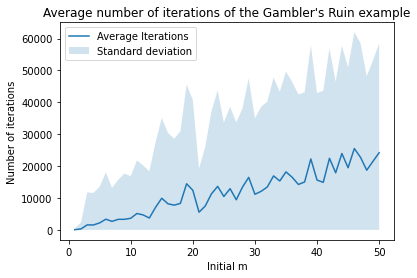

In [5]:
plot_average(results)

In [17]:
X,y = initial_m.reshape(-1,1), [results[str(i)][0] for i in initial_m]

reg = LinearRegression()



reg.fit(X,y)

print("MSE for the linear model = {}".format(mean_squared_error(reg.predict(X),y)))
print("R2 score for the linear model = {}".format(r2_score(reg.predict(X),y)))

print("The model is: \n \t Y = ax + b = {} x + {}".format(reg.coef_[0],reg.intercept_))

MSE for the linear model = 5065038.824146578
R2 score for the linear model = 0.8863898989600999
The model is: 
 	 Y = ax + b = 462.6903174069627 x + -59.544293877548625


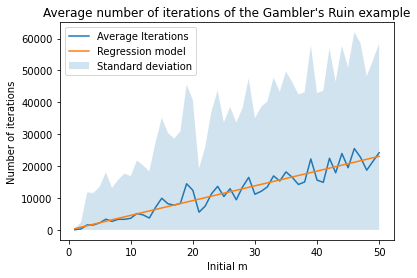

In [20]:
plot_average(results, [initial_m, reg.predict(X)])

In [19]:
value = np.array([200]).reshape(-1,1)
print("Prediction for e = 200: {}".format(reg.predict(value)[0]))

Prediction for e = 200: 92478.51918751499
